#**BSI - Data Science - Quarta Noite - Osório**
### Igor Cristian Gomes Mucharski

[Repositório](https://github.com/Mucharski/supervisedlearning)


# **Aprendizado de Máquina Supervisionado**

Este projeto projeto tem o intuito de implementar três algoritmos de aprendizado de máquina não supervisionado: K Means, PCA e Agrupamento Hierárquico. O *dataset* utilizado será o de **Sintomas e Resultado para COVID-19**, que pode ser encontrado [aqui](https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence).

In [222]:
import numpy as np
import pandas as pd

In [223]:
!git clone https://github.com/Mucharski/supervisedlearning

fatal: destination path 'supervisedlearning' already exists and is not an empty directory.


In [224]:
df = pd.read_csv('supervisedlearning/covid-symptoms-outcome.csv',
                    sep=',')

In [225]:
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [226]:
df.dtypes

Breathing Problem                          object
Fever                                      object
Dry Cough                                  object
Sore throat                                object
Running Nose                               object
Asthma                                     object
Chronic Lung Disease                       object
Headache                                   object
Heart Disease                              object
Diabetes                                   object
Hyper Tension                              object
Fatigue                                    object
Gastrointestinal                           object
Abroad travel                              object
Contact with COVID Patient                 object
Attended Large Gathering                   object
Visited Public Exposed Places              object
Family working in Public Exposed Places    object
Wearing Masks                              object
Sanitization from Market                   object


#**PRÉ-PROCESSAMENTO**

Vamos mudar os valores *Yes* e *No* para valores númericos. *No* será 0 e *Yes* será 1.

In [227]:
df = df.replace(['No'], 0).replace(['Yes'], 1)

In [228]:
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [229]:
df.dtypes

Breathing Problem                          int64
Fever                                      int64
Dry Cough                                  int64
Sore throat                                int64
Running Nose                               int64
Asthma                                     int64
Chronic Lung Disease                       int64
Headache                                   int64
Heart Disease                              int64
Diabetes                                   int64
Hyper Tension                              int64
Fatigue                                    int64
Gastrointestinal                           int64
Abroad travel                              int64
Contact with COVID Patient                 int64
Attended Large Gathering                   int64
Visited Public Exposed Places              int64
Family working in Public Exposed Places    int64
Wearing Masks                              int64
Sanitization from Market                   int64
COVID-19            

###**LEGENDA**

####**Breathing Problem = Dificuldade para respirar**
####**Fever = Febre**
####**Dry Cough = Tosse seca**
####**Sore throat = Dor de garganta**
####**Running Nose = Nariz escorrendo**
####**Asthma = Asma**
####**Chronic Lung Disease = Doença Pulmonar Crônica**
####**Headache = Dor de cabeça**
####**Heart Disease = Problema no coração**
####**Diabetes = Diabetes**
####**Hyper Tension = Hipertensão**
####**Fatigue = Cansaço**
####**Abroad travel = Viajou para fora do país**
####**Contract with COVID Patient = Contato com pessoa positiva**
####**Attended Large Gathering = Esteve em aglomerações**
####**Visited Public Exposed Places = Esteve em lugares públicos expostos**
####**Family working in Public Exposed Places = Família trablha em lugares públicos expostos**
####**Wearing Masks = Usando máscara**
####**Sanitization from Market = Se limpou após ida ao mercado**
####**COVID-19 = Resultado para COVID-19**

In [230]:
df.shape

(5434, 21)

Vamos pegar as 20 primeiras colunas, que são os previsores (sintomas de covid)

In [231]:
previsores = df.iloc[:, 0:20].values

In [232]:
previsores

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [233]:
previsores.shape

(5434, 20)

Agora o alvo, a coluna que diz se a pessoa teve COVID ou não

In [234]:
alvo = df.iloc[:, 20].values

In [235]:
alvo

array([1, 1, 1, ..., 0, 0, 0])

In [236]:
alvo.shape

(5434,)

In [237]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [238]:
from sklearn.preprocessing import StandardScaler

In [239]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [240]:
previsores_esc

array([[ 0.70788768,  0.52125432,  0.51153402, ...,  1.184187  ,
         0.        ,  0.        ],
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.84446122,
         0.        ,  0.        ],
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.84446122,
         0.        ,  0.        ],
       ...,
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.84446122,
         0.        ,  0.        ],
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.84446122,
         0.        ,  0.        ],
       [ 0.70788768,  0.52125432,  0.51153402, ..., -0.84446122,
         0.        ,  0.        ]])

In [241]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.707888,0.521254,0.511534,0.612088,0.916944,-0.927879,-0.945537,-1.007018,-0.930974,1.048661,1.020076,0.962428,1.063083,-0.906452,0.996693,-0.926506,0.962783,1.184187,0.0,0.0
1,0.707888,0.521254,0.511534,0.612088,-1.090579,1.077727,1.057600,0.993031,-0.930974,-0.953597,-0.980319,0.962428,-0.940661,-0.906452,-1.003318,1.079324,0.962783,-0.844461,0.0,0.0
2,0.707888,0.521254,0.511534,0.612088,0.916944,1.077727,1.057600,0.993031,-0.930974,1.048661,-0.980319,0.962428,1.063083,1.103202,-1.003318,-0.926506,-1.038656,-0.844461,0.0,0.0
3,0.707888,0.521254,0.511534,-1.633751,-1.090579,1.077727,-0.945537,-1.007018,1.074144,1.048661,-0.980319,-1.039039,-0.940661,1.103202,-1.003318,1.079324,0.962783,-0.844461,0.0,0.0
4,0.707888,0.521254,0.511534,0.612088,0.916944,-0.927879,1.057600,0.993031,1.074144,1.048661,1.020076,-1.039039,1.063083,-0.906452,0.996693,-0.926506,0.962783,-0.844461,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,0.707888,0.521254,-1.954904,0.612088,0.916944,1.077727,1.057600,-1.007018,-0.930974,-0.953597,-0.980319,0.962428,1.063083,-0.906452,-1.003318,-0.926506,-1.038656,-0.844461,0.0,0.0
5430,0.707888,0.521254,0.511534,-1.633751,0.916944,1.077727,-0.945537,0.993031,-0.930974,1.048661,1.020076,0.962428,-0.940661,-0.906452,-1.003318,-0.926506,-1.038656,-0.844461,0.0,0.0
5431,0.707888,0.521254,0.511534,-1.633751,-1.090579,-0.927879,-0.945537,-1.007018,1.074144,-0.953597,1.020076,-1.039039,-0.940661,-0.906452,-1.003318,-0.926506,-1.038656,-0.844461,0.0,0.0
5432,0.707888,0.521254,0.511534,-1.633751,0.916944,-0.927879,-0.945537,0.993031,1.074144,-0.953597,-0.980319,-1.039039,-0.940661,-0.906452,-1.003318,-0.926506,-1.038656,-0.844461,0.0,0.0


#**TREINO E TESTE**

In [242]:
from sklearn.model_selection import train_test_split

O Algoritmo será treinado com 70% do dataset e testado com 30%

In [243]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [244]:
x_treino.shape

(3803, 20)

In [245]:
x_teste.shape

(1631, 20)

In [246]:
y_treino.shape

(3803,)

In [247]:
y_teste.shape

(1631,)

#**ÁRVORE DE DECISÃO**

In [248]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [249]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
#arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.625, 0.875, 'X[13] <= 0.098\nentropy = 0.707\nsamples = 3803\nvalue = [733, 3070]'),
 Text(0.5, 0.625, 'X[0] <= -0.352\nentropy = 0.935\nsamples = 2090\nvalue = [733, 1357]'),
 Text(0.25, 0.375, 'X[2] <= -0.722\nentropy = 0.891\nsamples = 812\nvalue = [562, 250]'),
 Text(0.125, 0.125, 'entropy = 0.2\nsamples = 386\nvalue = [374, 12]'),
 Text(0.375, 0.125, 'entropy = 0.99\nsamples = 426\nvalue = [188, 238]'),
 Text(0.75, 0.375, 'X[15] <= 0.076\nentropy = 0.568\nsamples = 1278\nvalue = [171, 1107]'),
 Text(0.625, 0.125, 'entropy = 0.843\nsamples = 631\nvalue = [171, 460]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 647\nvalue = [0, 647]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 1713\nvalue = [0, 1713]')]

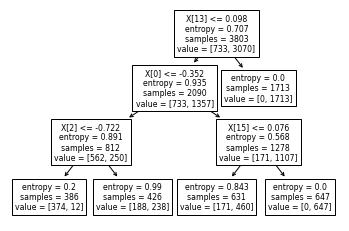

In [250]:
tree.plot_tree(_arvore)

O algoritmo não pode ser treinados com dados que ele já conhece, por isso separamos em teste e treino

Aqui, são as previsões da árvore utilizando o teste

In [251]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([1, 1, 1, ..., 1, 1, 1])

Aqui, os resultados de teste

In [252]:
y_teste

array([1, 1, 1, ..., 1, 1, 1])

In [253]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [254]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 89.45%


Alcançamos uma acurácia de 89.45% nos testes

In [255]:
confusion_matrix(y_teste, previsoes_arvore)

array([[ 151,  167],
       [   5, 1308]])

In [256]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.97      0.47      0.64       318
           1       0.89      1.00      0.94      1313

    accuracy                           0.89      1631
   macro avg       0.93      0.74      0.79      1631
weighted avg       0.90      0.89      0.88      1631



Treino

In [257]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([1, 1, 1, ..., 1, 1, 1])

In [258]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 90.24%


Acurácia de 90.24% no treino

In [259]:
accuracy_score(y_treino, previsoes_treino)

0.9024454378122535

In [260]:
confusion_matrix(y_treino, previsoes_treino)

array([[ 374,  359],
       [  12, 3058]])

#**RANDOM FOREST**

TESTE

In [261]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
random = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=500,
                       random_state=0)

In [263]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([1, 1, 1, ..., 1, 1, 1])

In [264]:
y_teste

array([1, 1, 1, ..., 1, 1, 1])

In [265]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [266]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 95.46%


Acurácia de 95.46% utilizando Random Forest em teste com 500 estimadores e profundidade 4.

In [267]:
confusion_matrix(y_teste, previsoes_random)

array([[ 245,   73],
       [   1, 1312]])

In [268]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       318
           1       0.95      1.00      0.97      1313

    accuracy                           0.95      1631
   macro avg       0.97      0.88      0.92      1631
weighted avg       0.96      0.95      0.95      1631



TREINO

In [269]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([1, 1, 1, ..., 1, 1, 1])

In [270]:
accuracy_score(y_treino, previsoes_treino)

0.9560872995003944

In [271]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 95.61%


Acurácia de 95.61% utilizando Random Forest em treino\com 500 estimadores e profundidade 4.

In [272]:
confusion_matrix(y_treino, previsoes_treino)

array([[ 566,  167],
       [   0, 3070]])

#**REGRESSÃO LOGÍSTICA**

In [273]:
from sklearn.linear_model import LogisticRegression

In [274]:
logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [275]:
logistica.intercept_

array([7.95010219])

In [276]:
logistica.coef_

array([[ 1.40076487,  1.66982642,  1.59611902,  1.52579696, -0.72145989,
        -0.07230988, -0.02824233, -0.11521575, -0.0387934 ,  0.1224355 ,
        -0.09852495,  0.06880533,  0.08275096,  3.54508554,  0.97133939,
         3.96779595, -0.26758948,  0.68549669,  0.        ,  0.        ]])

In [277]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([1, 1, 1, ..., 1, 1, 1])

In [278]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [279]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 96.38%


Acurácia de 96.38% utilizando Regressão Logística em teste com 500 iterações.

In [280]:
confusion_matrix(y_teste, previsoes_logistica)

array([[ 284,   34],
       [  25, 1288]])

In [281]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       318
           1       0.97      0.98      0.98      1313

    accuracy                           0.96      1631
   macro avg       0.95      0.94      0.94      1631
weighted avg       0.96      0.96      0.96      1631



TREINO

In [282]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([0, 1, 1, ..., 1, 1, 1])

In [283]:
accuracy_score(y_treino, previsoes_treino)

0.9726531685511438

In [284]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 97.27%


Acurácia de 97.27% utilizando Regressão Logística em treino com 500 iterações.

In [285]:
confusion_matrix(y_treino, previsoes_treino)

array([[ 674,   59],
       [  45, 3025]])

#**COMPARAÇÃO FINAL EM TREINO**

####**Árvore de Decisão: 90.24%**
####**Random Forest: 95.61%**
####**Regressão Logística: 97.27%**